## Question 1

In lecture, we used our Ising model simulation to calculate the specific heat per spin by considring the variance in the average energy. Recall however that specific heat is defined as the derivative of the average energy with respect to temperature: $$C=\frac{d\bar{E}}{dT}$$

Using the Ising Model simulation developed in lecture, consider a system that starts out with all spins up. Assume $H=0$ and $J=1$ and use a $20\times 20$ lattice. Calculate the specific heat per spin using the numerical derivative of the average energy with respect to the temperature. Plot the specific heat per spin calculated in this way as a function of temperature for temperatures between $T=\frac{1}{k_B}$ to $T=\frac{5}{k_b}$. Use the central difference for the numerical derivative, defined by Equation 5.95 in the textbook. Use $h=\frac{0.1}{k_B}$. To get the specific heat at temperature $T_0$, you will need to calculate the average energy at temperatures of $T_0 + \frac{h}{2}$ and $T_0 - \frac{h}{2}$.

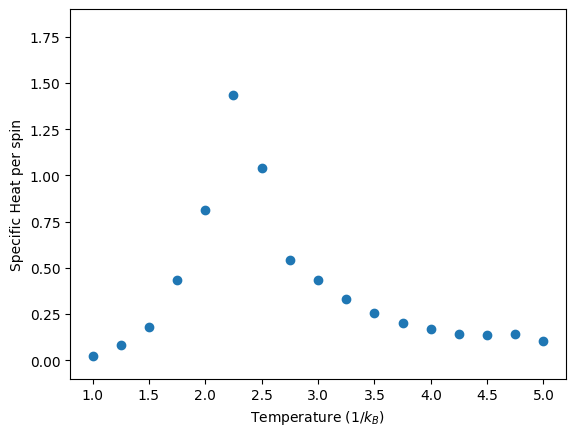

In [2]:
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt

Temps = np.linspace(1,5,17)

nsweeps=1000

def Espin(a):
    Jconst=1
    #get number of rows and columns from input array
    row,col=a.shape
    s=0
    for i in range(row):#loop over rows
        for j in range(col):#sum over neighboring pairs in row i
            c=j+1#calculate index of the column to the right of current column
            #if we've reached the last column
            #use the first column as the column to the right of the last entry
            if c==col:
                c=0
            s+=a[i][j]*a[i][c]
    for j in range(col):#loop over columns
        for i in range(row):#sum over neighboring pairs in column j
            r=i+1#calculate index of row below the current row
            #if we've reached the last row
            #use the first row as the row below the last entry
            if r==row:
                r=0
            s+=a[i][j]*a[r][j]
    return -Jconst*s

def prob(d):
    return math.exp(-d/T)

def magnetization(a):
    row,col=a.shape
    return np.sum(a)/(row*col)



#variable to store the average energy and average squared energy for each temperature
E=[]
E2=[]

for T in Temps:
    #Define starting lattice
    n=20
    lattice = np.zeros([n,n],int)
    lattice += 1
    Ecurrent=Espin(lattice)
    en=0
    en2=0
    for k in range(nsweeps):
        #Loop over each spin in lattice
        for i in range(n):
            for j in range(n):
                rup=i-1#look at row above
                if rup==-1:
                    rup=n-1
                rdown=i+1# look at row below
                if rdown==n:
                    rdown=0
                cleft=j-1#look at column to the left
                if cleft==-1:
                    cleft=n-1
                cright=j+1#look at column to the right
                if cright==n:
                    cright=0
                deltaE = 2*lattice[i][j]*(lattice[rup][j] + lattice[rdown][j] + lattice[i][cleft] + lattice[i][cright])
                if deltaE<0:#flip it
                    lattice[i][j] *= -1
                    Ecurrent += deltaE
                else:#maybe we flip it?
                    if rd.random()<prob(deltaE):
                        lattice[i][j] *= -1
                        Ecurrent += deltaE
        en += Ecurrent
        en2 += Ecurrent**2
    E.append(en/nsweeps)
    E2.append(en2/nsweeps)

sph=[]
for i in range(len(Temps)):
    sigma2=(E2[i]-E[i]**2)
    c=sigma2/(Temps[i]**2)
    sph.append(c/(n**2))#normalized per spin

plt.plot(Temps,sph,lw=0,marker="o")
label=r'Temperature (1/$k_B$)'
plt.xlabel(label)
plt.ylabel("Specific Heat per spin")
plt.ylim(-0.1,1.9)
plt.savefig("CvsT.png")
plt.show()
